# Prashant Anand Ranjan - 21105066
---
# LeNet 5

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)               0

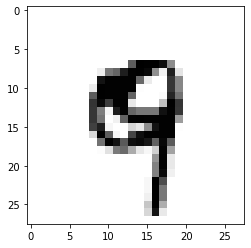

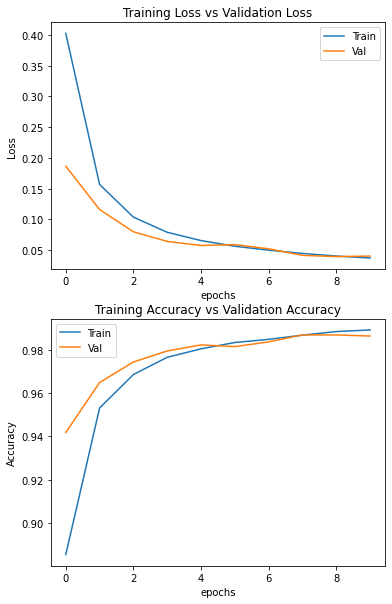

In [1]:
# Importing the libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Importing MNIST data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

rows, cols = 28, 28 # From the architecture, we set 28 x 28 as rows and columns

x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

input_shape = (rows, cols, 1)

# Normalizing the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

# Encoding the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

def build_lenet5(input_shape):
    # Sequential API
    model = tf.keras.Sequential()
    
    # Convolution #1.
    model.add(tf.keras.layers.Conv2D(filters=6,
                                    kernel_size=(5, 5),
                                    strides=(1, 1),
                                    activation='tanh',
                                    input_shape=input_shape))
    
    # SubSampling #1.
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2),
                                              strides=(2, 2)))
    
    # Convolution #2.
    model.add(tf.keras.layers.Conv2D(filters=16,
                                    kernel_size=(5, 5),
                                    strides=(1, 1),
                                    activation='tanh'))
    
    # SubSampling #2.
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2),
                                               strides=(2, 2)))
    
    # Converting all the resultant 2D arrays as single long continuous linear vector
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(units=120,
                                   activation='tanh'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=84,
                                   activation='tanh'))
    
    # Final, output and activation through softmax
    model.add(tf.keras.layers.Dense(units=10,
                                   activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0), 
                 metrics=['accuracy'])
    model.summary()
    return model

lenet = build_lenet5(input_shape)
epochs = 10  # Number of epochs
history = lenet.fit(x_train, y_train,
                   epochs=epochs,
                   batch_size=128,
                   verbose=1,  validation_data=(x_test, y_test))
loss, acc = lenet.evaluate(x_test, y_test)
print('ACCURACY : ', acc)

# Trasform back to 28 x 28 pixel
x_train = x_train.reshape(x_train.shape[0], 28, 28)
print('Training Data ', x_train.shape, y_train.shape)

# Trasform back to 28 x 28
x_test = x_test.reshape(x_test.shape[0], 28, 28)
print('Test Data ', x_test.shape, y_test.shape)

image_index = 4444         # '4444' represent number 9 in dataset
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred = lenet.predict(x_test[image_index].reshape(1, rows, cols, 1))
print('The predicted number is : ',pred.argmax())

# Ploting for Losses and Accuracy
fig, axs = plt.subplots(2, 1, figsize=(6,10))  
axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss']) 
axs[0].title.set_text('Training Loss vs Validation Loss') 
axs[0].set(xlabel='epochs', ylabel='Loss')
axs[0].legend(['Train', 'Val'])  
axs[1].plot(history.history['accuracy']) 
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy') 
axs[1].set(xlabel='epochs', ylabel='Accuracy')
axs[1].legend(['Train', 'Val'])

The predicted number is :  2


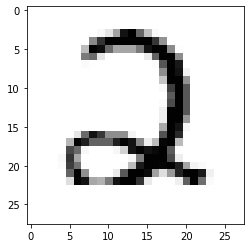

In [2]:
'Randomly pick the data from the dataset'
import random
image_index = int(random.randrange(0, x_test.shape[0]))
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred = lenet.predict(x_test[image_index].reshape(1, rows, cols, 1))
print('The predicted number is : ',pred.argmax())

# LeNet 4

Epoch 1/10
469/469 [==============================] - 8s 16ms/step - loss: 0.4494 - accuracy: 0.8788 - val_loss: 0.2240 - val_accuracy: 0.9359
Epoch 2/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1940 - accuracy: 0.9435 - val_loss: 0.1450 - val_accuracy: 0.9568
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1366 - accuracy: 0.9599 - val_loss: 0.1089 - val_accuracy: 0.9682
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1077 - accuracy: 0.9680 - val_loss: 0.0936 - val_accuracy: 0.9716
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0909 - accuracy: 0.9737 - val_loss: 0.0781 - val_accuracy: 0.9748
Epoch 6/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0791 - accuracy: 0.9771 - val_loss: 0.0677 - val_accuracy: 0.9782
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0706 - accuracy: 0.9792 - val_loss: 0.0623 - val_accuracy: 0.9797

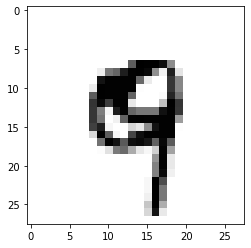

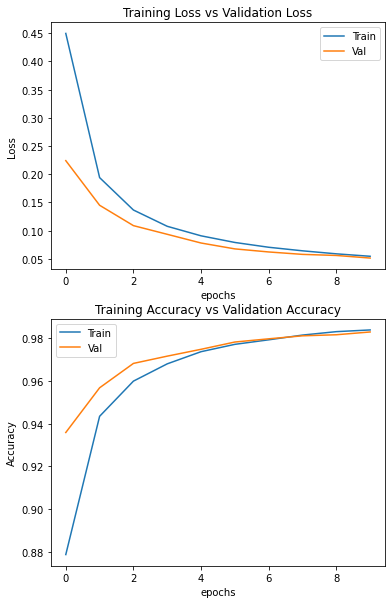

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

rows, cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

input_shape = (rows, cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

def build_lenet4(input_shape):
    model = tf.keras.Sequential()
    
    # Convolution #1.
    model.add(tf.keras.layers.Conv2D(filters=4,
                                    kernel_size=(5, 5),
                                    strides=(1, 1),
                                    activation='tanh',
                                    input_shape=input_shape))
    
    # SubSampling #1.
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2),
                                              strides=(2, 2)))
    
    # Convolution #2.
    model.add(tf.keras.layers.Conv2D(filters=16,
                                    kernel_size=(5, 5),
                                    strides=(1, 1),
                                    activation='tanh'))
    # SubSampling #2.
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2),
                                               strides=(2, 2)))
    
    # Flattening
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=120,
                                   activation='tanh'))
    
    # Final output
    model.add(tf.keras.layers.Dense(units=10,
                                   activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0), 
                 metrics=['accuracy'])
    return model

lenet = build_lenet4(input_shape)
epochs = 10
history = lenet.fit(x_train, y_train,
                   epochs=epochs,
                   batch_size=128,
                   verbose=1,  validation_data=(x_test, y_test))
loss, acc = lenet.evaluate(x_test, y_test)
print('ACCURACY : ', acc)

x_train = x_train.reshape(x_train.shape[0], 28, 28)
print('Training Data ', x_train.shape, y_train.shape)

x_test = x_test.reshape(x_test.shape[0], 28, 28)
print('Test Data ', x_test.shape, y_test.shape)

image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred = lenet.predict(x_test[image_index].reshape(1, rows, cols, 1))
print('The predicted number is : ',pred.argmax())

# Ploting for Losses and Accuracy
fig, axs = plt.subplots(2, 1, figsize=(6,10))  
axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss']) 
axs[0].title.set_text('Training Loss vs Validation Loss') 
axs[0].set(xlabel='epochs', ylabel='Loss')
axs[0].legend(['Train', 'Val'])  
axs[1].plot(history.history['accuracy']) 
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy') 
axs[1].set(xlabel='epochs', ylabel='Accuracy')
axs[1].legend(['Train', 'Val'])

# LeNet 1

Epoch 1/10
469/469 [==============================] - 7s 16ms/step - loss: 0.5700 - accuracy: 0.8403 - val_loss: 0.2883 - val_accuracy: 0.9184
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2625 - accuracy: 0.9251 - val_loss: 0.2100 - val_accuracy: 0.9392
Epoch 3/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2050 - accuracy: 0.9419 - val_loss: 0.1752 - val_accuracy: 0.9482
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1717 - accuracy: 0.9509 - val_loss: 0.1452 - val_accuracy: 0.9565
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1489 - accuracy: 0.9574 - val_loss: 0.1273 - val_accuracy: 0.9627
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1325 - accuracy: 0.9623 - val_loss: 0.1141 - val_accuracy: 0.9673
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 0.1201 - accuracy: 0.9663 - val_loss: 0.1043 - val_accuracy: 0.9701

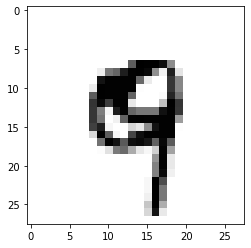

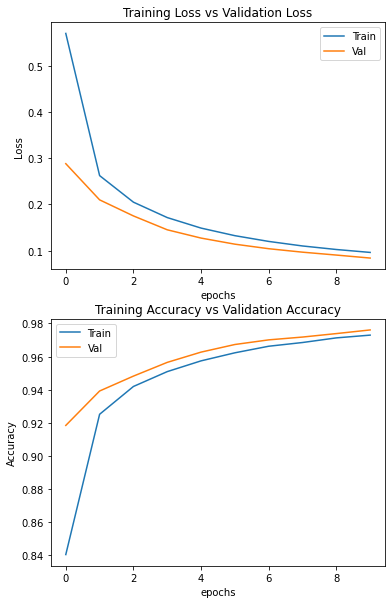

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

rows, cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

input_shape = (rows, cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

def build_lenet1(input_shape):
    model = tf.keras.Sequential()
    # Convolution #1.
    model.add(tf.keras.layers.Conv2D(filters=4,
                                    kernel_size=(5, 5),
                                    strides=(1, 1),
                                    activation='tanh',
                                    input_shape=input_shape))
    
    # SubSampling #1.
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2),
                                              strides=(2, 2)))
    
    # Convolution #2.
    model.add(tf.keras.layers.Conv2D(filters=12,
                                    kernel_size=(5, 5),
                                    strides=(1, 1),
                                    activation='tanh'))
    
    # SubSampling #2.
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2),
                                               strides=(2, 2)))
    
    # Flattening
    model.add(tf.keras.layers.Flatten())
    
    # Final output
    model.add(tf.keras.layers.Dense(units=10,
                                   activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0), 
                 metrics=['accuracy'])
    return model

lenet = build_lenet1(input_shape)
epochs = 10
history = lenet.fit(x_train, y_train,
                   epochs=epochs,
                   batch_size=128,
                   verbose=1, validation_data=(x_test, y_test))
loss, acc = lenet.evaluate(x_test, y_test)
print('ACCURACY : ', acc)

x_train = x_train.reshape(x_train.shape[0], 28, 28)
print('Training Data ', x_train.shape, y_train.shape)

x_test = x_test.reshape(x_test.shape[0], 28, 28)
print('Test Data ', x_test.shape, y_test.shape)

image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred = lenet.predict(x_test[image_index].reshape(1, rows, cols, 1))
print('The predicted number is : ',pred.argmax());

# Ploting for Losses and Accuracy
fig, axs = plt.subplots(2, 1, figsize=(6,10))  
axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss']) 
axs[0].title.set_text('Training Loss vs Validation Loss') 
axs[0].set(xlabel='epochs', ylabel='Loss')
axs[0].legend(['Train', 'Val'])  
axs[1].plot(history.history['accuracy']) 
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy') 
axs[1].set(xlabel='epochs', ylabel='Accuracy')
axs[1].legend(['Train', 'Val'])